**Zahteve**
- scatter plot starost proti ceni na m2:
    - isto za vrsto nepremičnine
- na mapi narisan novogradnje
- barplot za count hiš, stanovanj, parcel, poslovnih prostorov
- za vsako regijo razmerje med številom prebivalcev in povprečno ceno na m2:
    - lahko stolpični diagram ali na mapi

**Ugotovitve**
1. starost nepremičnine in cena nista korelirani
2. večina novogradenj je v večjih slovenskih mestih, prav tako pa jih je kar nekaj blizu meje na Hrvaškem
3. kot pričakovano je največ oglasov za hiše in stanovanja, tem sledijo posesti/parcele in poslovni prostori
4. na prvem stolpičnem diagramu lahko vidimo, da največje razmerje med povprečno ceno stanovanja in številom prebivalcev pripada obalno-kraški regiji. To je predvidoma res, zaradi velikega števila počitniških hiš, katerih prebivalci nimajo stalnega naslova v tej regiji. Prav tako pa je presenetljivo, da je regija, ki vsebuje Ljubljano - osrednjeslovenska regija - zelo nizko. To je res zaradi velikega števila prebivalcev. Nekakšen popravek tega lahko vidimo na naslednjem diagramu, ki prikazuje razmerje med povprečno ceno stanovanja in povprečno neto plačo prebivalcev te regije. Na nek način prikaže koliko mesecev bi prebivalec neke regije moral delati, da bi si lahko privoščil povprečno stanovanje/hišo, brez da upoštevamo druge mesečne stroške. Na tem diagramu je osrednjeslovenska regija druga po vrsti, kar ni presenetljivo.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import python_data

# bolha = pd.read_csv('../data/bolha.csv', sep=",")
# mojikvadrati = pd.read_csv('../data/mojikvadrati.csv', sep=",")
mojikvadrati2 = pd.read_csv('../data/mojikvadrati2.csv', sep=",")
# nepremicnine_o = pd.read_csv('../data/nepremicnine_oddaja.csv', sep=",")
nepremicnine = pd.read_csv('../data/nepremicnine_prodaja.csv', sep=",")


mojikvadrati2
nepremicnine
# bolha

,url,name,short_description,type,administrative_unit,region,attributes,seller,municipality,forwarding,price,description,id
0,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 3-sobno: AJDOVŠČINA, ENKR...","AJDOVŠČINA, ENKRATNA LOKACIJA NAD AJDOVŠČINO, ...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 2, 'Št. kopalnic': 1, 'Atrij':...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,456000.0,Stanovanje B3-1 Klasična zasnova s sodobnim pr...,6854874
1,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 4-sobno: AJDOVŠČINA, MIRN...","AJDOVŠČINA, MIRNA LOKACIJA NAD AJDOVŠČINO, 105...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 3, 'Št. kopalnic': 1, 'Parkirn...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,392160.0,Stanovanje A1-6 Klasična zasnova s sodobnim pr...,6854873
2,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 3-sobno: AJDOVŠČINA, PRED...","AJDOVŠČINA, PREDEL ŠTURJE, 81,8 m2, 3-sobno, n...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 2, 'Št. kopalnic': 1, 'Parkirn...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,320460.0,Stanovanje B2-6 Klasična zasnova s sodobnim pr...,6924490
3,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 3-sobno: AJDOVŠČINA, ŠTUR...","AJDOVŠČINA, ŠTURJE NAD AJDOVŠČINO. V PRIHODU, ...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 2, 'Št. kopalnic': 1, 'Parkirn...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,353260.0,Stanovanje B1-5 Klasična zasnova s sodobnim pr...,6875688
4,https://www.nepremicnine.net/oglasi-prodaja/an...,"Prodaja, hiša, dvojček: ANKARAN, 132.3 m2","ANKARAN, 132,3 m2, dvojček, zgrajen l. 2007, 2...",Hiša,Koper,J. Primorska,{'Polno opremljeno': True},ABC nepremičnine d.o.o.,Ankaran,Prodaja,588000.0,"ANKARAN, Kolomban, parcela 207m2, stanovanjska...",6970917
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63847,75000.0,Žužemberk,https://www.nepremicnine.net/oglasi-prodaja/zu...,Prodaja,Dolenjska,"Hiša obsega kletne prostore, pritličje in mans...",Hiša,"ŽUŽEMBERK, LOPATA, 125 m2, samostojna, zgrajen...",Novo mesto,"Nepremičnine Prijatelj, svetovanje in nepremič...","{'Velikost': 125.0, 'Nadstropje': 'K+P+M', 'Št...",6852630,"Prodaja, hiša, samostojna: ŽUŽEMBERK, LOPATA, ..."
63848,490000.0,Tinjan,https://www.nepremicnine.net/oglasi-prodaja/zu...,Prodaja,Istrska,"Na prodaj je čudovita vila v gradnji, ki se na...",Hiša,"ŽUŽIĆI, 156 m2, samostojna, adaptirana l. 2025...",NaN,NO.1 REAL ESTATE Ltd,"{'Velikost': 156.0, 'Št. spalnic': 3, 'Bazen':...",6933500,"Prodaja, hiša, samostojna: ŽUŽIĆI, 156 m2"
63849,74000.0,Tinjan,https://www.nepremicnine.net/oglasi-prodaja/zu...,Prodaja,Istrska,"Na relaciji Poreč-Pazin, v mestecu Tinjan, se ...",Posest,"ŽUŽIĆI, 842 m2, zazidljiva, prodamo. Cena: 74....",NaN,NO.1 REAL ESTATE Ltd,{'Zemljišče': '842 m'},6802297,"Prodaja, posest, zazidljiva: ŽUŽIĆI, 842 m2"
63850,29990.0,Ormož,https://www.nepremicnine.net/oglasi-prodaja/zv...,Prodaja,Podravska,Sredi idilične panonske pokrajine obdane z vin...,Hiša,"ŽVAB, 33 m2, samostojna, zgrajena l. 1800, 3.9...",Ormož,Jeruzalem Ormož SAT d.o.o.,"{'Velikost': 33.0, 'Št. spalnic': 1, 'Shramba'...",6591330,"Prodaja, hiša, samostojna: ŽVAB, 33 m2"


(1800.0, 2030.0)

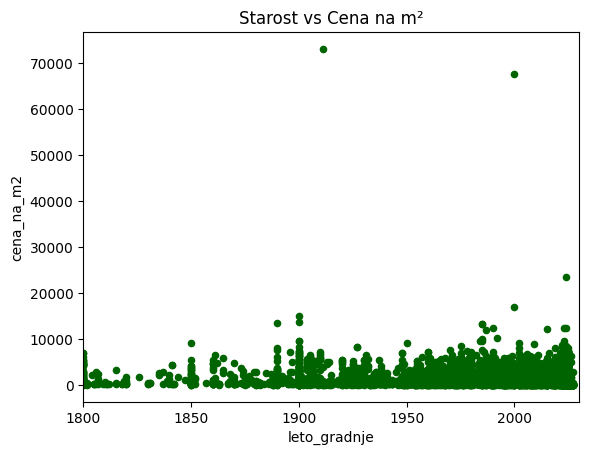

In [3]:
#mojikvadrati2[[""]].dropna(subset=['leto_gradnje']).plot(kind='scatter', x='leto_gradnje', y='cena_na_m2', title='Starost vs Cena na m²', color='darkgreen')

mojikvadrati2_f = mojikvadrati2[mojikvadrati2['cena'].str.split().str.get(1) == '€'].copy()

mojikvadrati2_f['cena_na_m2'] = mojikvadrati2_f['cena'].str.split().str.get(0).str.replace('.', '', regex=False).str.replace(',', '.').astype(float)

mojikvadrati2_f['cena_na_m2'] = mojikvadrati2_f['cena_na_m2'] / mojikvadrati2_f['velikost'].str.replace('.', '').str.replace('m2', '', regex=False).str.strip().astype(float)

# mojikvadrati2_f.sort_values(by=['cena_na_m2'], ascending=False)

# m = mojikvadrati2[mojikvadrati2['cena'].str.split().str.get(1) == '€'].copy()
# m['cena'] = m['cena'].str.replace('.', '').str.replace(',','.').str.strip(' €').astype(float)
# m.sort_values(by=['cena'], ascending=False)

mojikvadrati2_f[['leto_gradnje', 'cena_na_m2']].dropna(subset=['leto_gradnje']).plot(kind='scatter', x='leto_gradnje', y='cena_na_m2', title='Starost vs Cena na m²', color='darkgreen')


plt.xlim((1800, 2030))
#plt.ylim(0, 100000)

In [4]:
mojikvadrati2_f[['leto_gradnje', 'cena_na_m2']].dropna(subset=['leto_gradnje']).corr()["leto_gradnje"].cena_na_m2

np.float64(-0.036332504012261346)

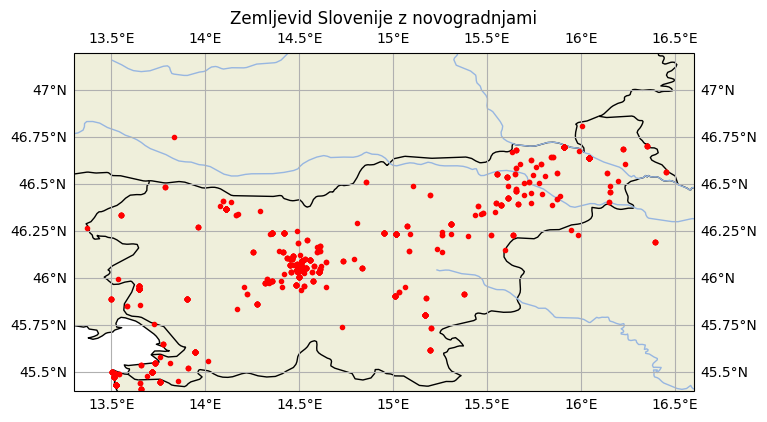

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geo_lookup")

newly_built = mojikvadrati2[mojikvadrati2["leto_gradnje"] > 2021]

# Seznam točk (longitude, latitude) - npr. Ljubljana, Maribor, Koper
points = [
    (14.5058, 46.0569),  # Ljubljana
    (15.6467, 46.5547),  # Maribor
    (13.7300, 45.5481),  # Koper
]

# newly_built

# Nastavi prikaz z geografsko projekcijo
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([13.3, 16.6, 45.4, 47.2])  # Meje Slovenije (približno)

# Dodaj zemljevidne značilnosti
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

# Prikaz točk
# for lon, lat in points:
#     ax.plot(lon, lat, marker='o', color='red', markersize=6, transform=ccrs.PlateCarree())

for index, row in newly_built.iterrows():
    ax.plot(row['longitude'], row['latitude'], marker='o', color='red', markersize=3, transform=ccrs.PlateCarree())

plt.title('Zemljevid Slovenije z novogradnjami')
plt.show()

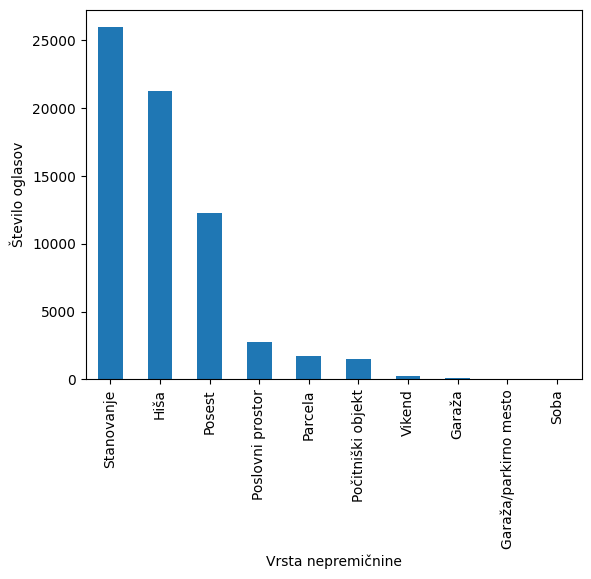

In [6]:
# mojikvadrati2[mojikvadrati2["vrsta"].isin(["Hiša", "Stanovanje", "Poslovni prostor", "Parcela"])]["vrsta"].value_counts().plot(kind='bar')
pd.concat([mojikvadrati2[mojikvadrati2["vrsta"].isin(["Hiša", "Stanovanje", "Poslovni prostor", "Parcela", "Posest", "Garaža/parkirno mesto", "Soba"])]["vrsta"],
           nepremicnine[nepremicnine["type"].isin(["Hiša", "Stanovanje", "Poslovni prostor", "Parcela", "Posest", "Počitniški objekt", "Vikend", "Garaža"])]["type"]]).value_counts().plot(kind='bar')

plt.xlabel('Vrsta nepremičnine')
plt.ylabel('Število oglasov')
plt.show()

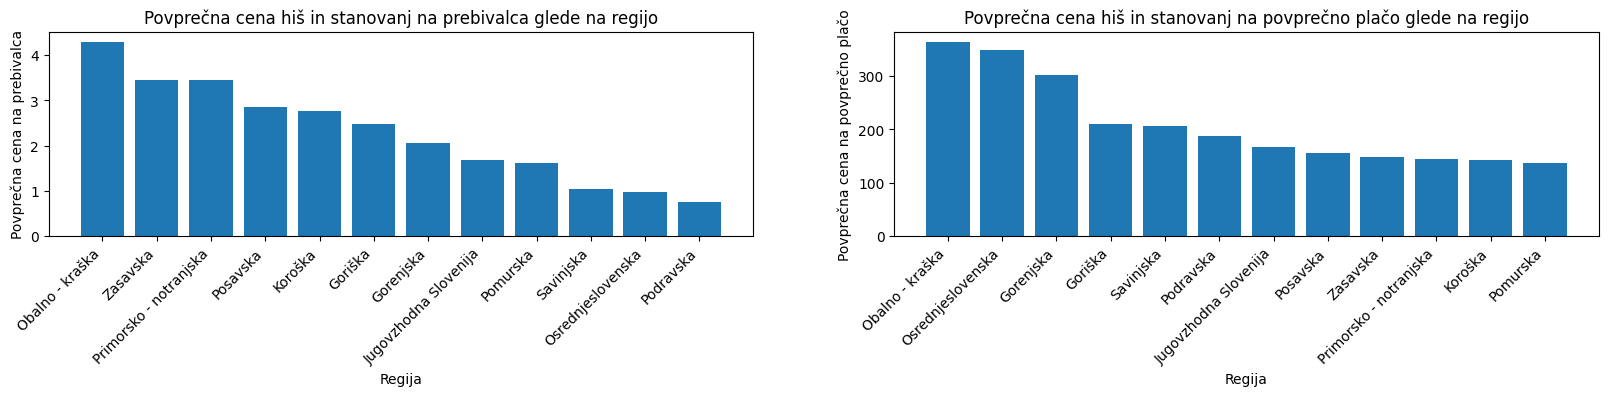

In [7]:
nepremicnine_mun = nepremicnine[(nepremicnine["municipality"].isin(python_data.municipalities)) & (nepremicnine["type"].isin(["Hiša", "Stanovanje"]))].copy()
nepremicnine_mun["price"] = nepremicnine_mun["price"].astype(float)


nepremicnine_mun["correct_region"] = nepremicnine_mun["municipality"].apply(lambda x: python_data.municipalities[x])

# ignoriramo osamelca https://www.nepremicnine.net/oglasi-prodaja/ribnica-na-pohorju-zaklad-narave-hisa_6968182/
region_prices = nepremicnine_mun[(nepremicnine_mun["price"] >= 50000) & (nepremicnine_mun["price"] < 100000000)].groupby(["correct_region"])["price"].agg("mean").reset_index()



price_per_resident = {}
price_per_income = {}
for reg, avg in zip(region_prices.correct_region, region_prices.price):
    price_per_resident[reg] = avg / python_data.regions_population[reg]
    price_per_income[reg] = avg / python_data.regions_avg_income[reg]


price_per_resident = sorted(price_per_resident.items(), key=lambda x: x[1], reverse=True)
price_per_income = sorted(price_per_income.items(), key=lambda x: x[1], reverse=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

axes[0].bar([e for e, _ in price_per_resident], [e for _, e in price_per_resident])
axes[0].set_xlabel("Regija")
axes[0].set_ylabel("Povprečna cena na prebivalca")
axes[0].set_title("Povprečna cena hiš in stanovanj na prebivalca glede na regijo")
axes[1].bar([e for e, _ in price_per_income], [e for _, e in price_per_income])
axes[1].set_xlabel("Regija")
axes[1].set_ylabel("Povprečna cena na povprečno plačo")
axes[1].set_title("Povprečna cena hiš in stanovanj na povprečno plačo glede na regijo")


fig.autofmt_xdate(rotation=45)
fig.set_figwidth(20)

# plt.bar([e for e, _ in price_per_resident], [e for _, e in price_per_resident])
# plt.ylabel('Povprečna cena na prebivalca')
# plt.xlabel('Regija')
# plt.xticks(rotation='vertical')
# plt.show()


In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. Naloži geojson
gdf = gpd.read_file("../data/regije/statistical-regions-gurs-simplified.geojson")

# 2. Primer podatkov
df = pd.DataFrame({
    "REGIJA": [e.replace(" - ", "-") for e, _ in price_per_income],
    "CENA": [e for _, e in price_per_income]
})

# 3. Združi geo in podatke
gdf = gdf.merge(df, left_on="name", right_on="REGIJA")

# 4. Pripravi barvno lestvico
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

# Barvna lestvica in normalizacija
cmap = plt.cm.Reds
norm = mpl.colors.Normalize(vmin=gdf["CENA"].min(), vmax=gdf["CENA"].max())

# Nariši zemljevid
gdf.plot(column="CENA", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.5')

# Ustvari barvno skalo (colorbar) s pravo labelo
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Hack za ScalarMappable brez podatkov
# cbar = fig.colorbar(sm, ax=ax)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.07, fraction=0.025)
cbar.set_label("Povprečna cena na povprečno plačo", fontsize=12)

# Dodatki
ax.set_title("Povprečna cena hiš in stanovanj na povprečno plačo glede na regijo", fontsize=15)
ax.axis("off")

plt.show()


DataSourceError: ../data/regije/statistical-regions-gurs-simplified.geojson: No such file or directory

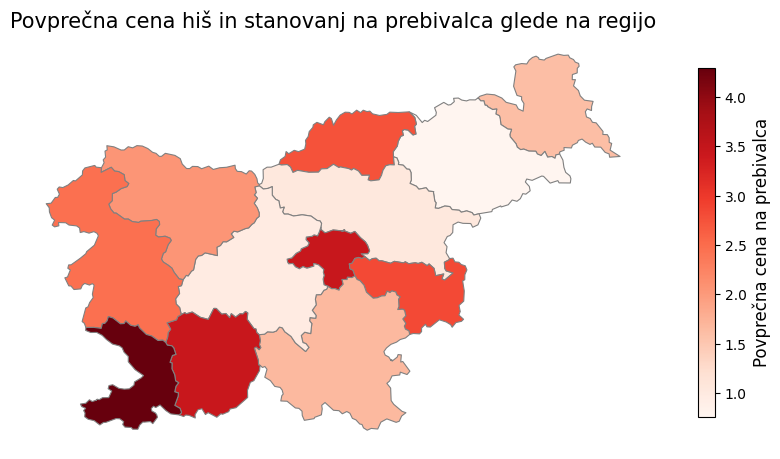

In [65]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. Naloži geojson
gdf = gpd.read_file("../data/regije/statistical-regions-gurs-simplified.geojson")

# 2. Primer podatkov
df = pd.DataFrame({
    "REGIJA": [e.replace(" - ", "-") for e, _ in price_per_resident],
    "CENA": [e for _, e in price_per_resident]
})

# 3. Združi geo in podatke
gdf = gdf.merge(df, left_on="name", right_on="REGIJA")

# 4. Pripravi barvno lestvico
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

# Barvna lestvica in normalizacija
cmap = plt.cm.Reds
norm = mpl.colors.Normalize(vmin=gdf["CENA"].min(), vmax=gdf["CENA"].max())

# Nariši zemljevid
gdf.plot(column="CENA", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.5')

# Ustvari barvno skalo (colorbar) s pravo labelo
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Hack za ScalarMappable brez podatkov
# cbar = fig.colorbar(sm, ax=ax)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.07, fraction=0.025)
cbar.set_label("Povprečna cena na prebivalca", fontsize=12)

# Dodatki
ax.set_title("Povprečna cena hiš in stanovanj na prebivalca glede na regijo", fontsize=15)
ax.axis("off")

plt.show()

In [24]:
nepremicnine_mun

,url,name,short_description,type,administrative_unit,region,attributes,seller,municipality,forwarding,price,description,id,correct_region
0,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 3-sobno: AJDOVŠČINA, ENKR...","AJDOVŠČINA, ENKRATNA LOKACIJA NAD AJDOVŠČINO, ...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 2, 'Št. kopalnic': 1, 'Atrij':...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,456000.0,Stanovanje B3-1 Klasična zasnova s sodobnim pr...,6854874,Goriška
1,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 4-sobno: AJDOVŠČINA, MIRN...","AJDOVŠČINA, MIRNA LOKACIJA NAD AJDOVŠČINO, 105...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 3, 'Št. kopalnic': 1, 'Parkirn...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,392160.0,Stanovanje A1-6 Klasična zasnova s sodobnim pr...,6854873,Goriška
2,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 3-sobno: AJDOVŠČINA, PRED...","AJDOVŠČINA, PREDEL ŠTURJE, 81,8 m2, 3-sobno, n...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 2, 'Št. kopalnic': 1, 'Parkirn...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,320460.0,Stanovanje B2-6 Klasična zasnova s sodobnim pr...,6924490,Goriška
3,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 3-sobno: AJDOVŠČINA, ŠTUR...","AJDOVŠČINA, ŠTURJE NAD AJDOVŠČINO. V PRIHODU, ...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 2, 'Št. kopalnic': 1, 'Parkirn...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,353260.0,Stanovanje B1-5 Klasična zasnova s sodobnim pr...,6875688,Goriška
4,https://www.nepremicnine.net/oglasi-prodaja/an...,"Prodaja, hiša, dvojček: ANKARAN, 132.3 m2","ANKARAN, 132,3 m2, dvojček, zgrajen l. 2007, 2...",Hiša,Koper,J. Primorska,{'Polno opremljeno': True},ABC nepremičnine d.o.o.,Ankaran,Prodaja,588000.0,"ANKARAN, Kolomban, parcela 207m2, stanovanjska...",6970917,Obalno - kraška
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58920,https://www.nepremicnine.net/oglasi-prodaja/vi...,"Prodaja, stanovanje, 2-sobno: VIPOLŽE, 54 m2","VIPOLŽE, 54 m2, 2-sobno, zgrajeno l. 1910, ada...",Stanovanje,Nova Gorica,S.Primorska,"{'Velikost': 54.0, 'Št. spalnic': 1, 'Št. kopa...","RE/MAX Ljubljana, Nepremičninska družba d.o.o.",Brda,Prodaja,124500.0,NaN,6852598,Goriška
58921,https://www.nepremicnine.net/oglasi-prodaja/vi...,"Prodaja, hiša, samostojna: VIPOLŽE, 76.5 m2","VIPOLŽE, 76,5 m2, samostojna, zgrajena l. 1807...",Hiša,Nova Gorica,S.Primorska,"{'Št. spalnic': 3, 'Št. kopalnic': 2, 'Atrij':...","Renes d.o.o., PE Nova Gorica",Brda,Prodaja,175000.0,NaN,6911794,Goriška
58922,https://www.nepremicnine.net/oglasi-prodaja/vi...,"Prodaja, hiša: VIPOLŽE, 114 m2","VIPOLŽE, 114 m2, vrstna, zgrajena l. 1850, ada...",Hiša,Nova Gorica,S.Primorska,"{'Velikost': 114.0, 'Nadstropje': 'P+1+M', 'Št...",ZASEBNA PONUDBA,Brda,Prodaja,220000.0,NaN,6968303,Goriška
58952,https://www.nepremicnine.net/oglasi-prodaja/vi...,"Prodaja, stanovanje, 2,5-sobno: VIR, 50 m2","VIR, 50 m2, 2,5-sobno, zgrajeno l. 1957, adapt...",Stanovanje,Domžale,LJ-okolica,"{'Velikost': 50.0, 'Nadstropje': '2/2', 'Št. s...",ZASEBNA PONUDBA,Domžale,Prodaja,160000.0,Naprodaj 2-sobno stanovanje z balkonom in ogra...,6970461,Osrednjeslovenska


In [9]:
# Getting the data set up for the regressor

nepremicnine_reg = nepremicnine[(nepremicnine["municipality"].isin(python_data.municipalities))].copy()
# nepremicnine_reg["price"] = nepremicnine_reg["price"].astype(float)

nepremicnine_reg['price'] = pd.to_numeric(nepremicnine_reg['price'], errors='coerce')
nepremicnine_reg.dropna(subset=['price'], inplace=True)

nepremicnine_reg["correct_region"] = nepremicnine_reg["municipality"].apply(lambda x: python_data.municipalities[x])


def price_from_name(name):
    try:
        trailer = name.split(',')[-1].strip()
        m2 = float(trailer.replace("m2", "").replace(" ", "").replace(",", "."))
        return m2
    except:
        return np.nan

nepremicnine_reg['size'] = nepremicnine_reg['name'].apply(price_from_name)
nepremicnine_reg = nepremicnine_reg[(nepremicnine_reg["price"] >= 10000) & (nepremicnine_reg["price"] < 100000000)][["type", "correct_region", "size", "price"]]
nepremicnine_reg.dropna(subset=['size'], inplace=True)

nepremicnine_norm = nepremicnine_reg.copy()
nepremicnine_norm["price_per_m2"] = nepremicnine_norm["price"] / nepremicnine_norm["size"]
nepremicnine_norm = nepremicnine_norm.drop('price', axis=1)
nepremicnine_norm = nepremicnine_norm.drop('size', axis=1)

# nepremicnine_reg
nepremicnine_norm

,type,correct_region,price_per_m2
0,Stanovanje,Goriška,2701.421801
1,Stanovanje,Goriška,3727.756654
2,Stanovanje,Goriška,3917.603912
3,Stanovanje,Goriška,3754.091392
4,Hiša,Obalno - kraška,4444.444444
...,...,...,...
58920,Stanovanje,Goriška,2305.555556
58921,Hiša,Goriška,2287.581699
58922,Hiša,Goriška,1929.824561
58952,Stanovanje,Osrednjeslovenska,3200.000000


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

X = nepremicnine_reg[["type", "correct_region", "size"]]
y = nepremicnine_reg["price"]

categorical_features = ['correct_region', 'type']
numerical_features = ['size']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regresija', RandomForestRegressor(n_estimators=100))
])

pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['correct_region',
                                                   'type'])])),
                ('regresija', RandomForestRegressor())])

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

X = nepremicnine_reg[["type", "correct_region", "size"]]
y = nepremicnine_reg["price"]

categorical_features = ['correct_region', 'type']
numerical_features = ['size']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regresija', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pipeline.fit(X_train, y_train)
print("R² na testnem setu:", pipeline.score(X_test, y_test))

R² na testnem setu: 0.1751056218928554


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

modeli = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    #'KNN': KNeighborsRegressor(), # Not good
    #'MLP': MLPRegressor(max_iter=1000)
}

X = nepremicnine_reg[["type", "correct_region", "size"]]
y = nepremicnine_reg["price"]

categorical_features = ['correct_region', 'type']
numerical_features = ['size']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
for ime, model in modeli.items():

    pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regresija', model)])

    pipeline.fit(X_train, y_train)
    print(f"R² na testnem setu ({ime}):", pipeline.score(X_test, y_test))

R² na testnem setu (Linear): 0.14971610820108838
R² na testnem setu (Ridge): 0.13927408158608
R² na testnem setu (Lasso): 0.16447484608330487
R² na testnem setu (RandomForest): 0.3984012649470341
R² na testnem setu (GradientBoosting): 0.456343235390829


In [15]:
new_data = pd.DataFrame({
    'correct_region': ['Savinjska', "Osrednjeslovenska", "Gorenjska", 'Osrednjeslovenska', 'Obalno - kraška'],
    'type': ['Hiša', 'Stanovanje', 'Stanovanje', 'Hiša', 'Stanovanje'],
    'size': [181, 75, 142, 186, 147]
})

napovedi = pipeline.predict(new_data)
print(napovedi)

[282942.3582918  337780.5190346  331608.47990581 579700.30242082
 484687.4756602 ]


Navadni podatki
                                  feature  importance
0                                    size    0.761154
11       correct_region_Osrednjeslovenska    0.069152
2                             type_Posest    0.053124
3                   type_Poslovni prostor    0.028981
10         correct_region_Obalno - kraška    0.023633
16               correct_region_Savinjska    0.013478
15  correct_region_Primorsko - notranjska    0.011414
12               correct_region_Podravska    0.007664
14                correct_region_Posavska    0.007247
5                         type_Stanovanje    0.006071
1                               type_Hiša    0.004757
7                  correct_region_Goriška    0.004519
8    correct_region_Jugovzhodna Slovenija    0.002839
13                correct_region_Pomurska    0.002011
4                  type_Počitniški objekt    0.001722
9                  correct_region_Koroška    0.001043
17                correct_region_Zasavska    0.000930
6           

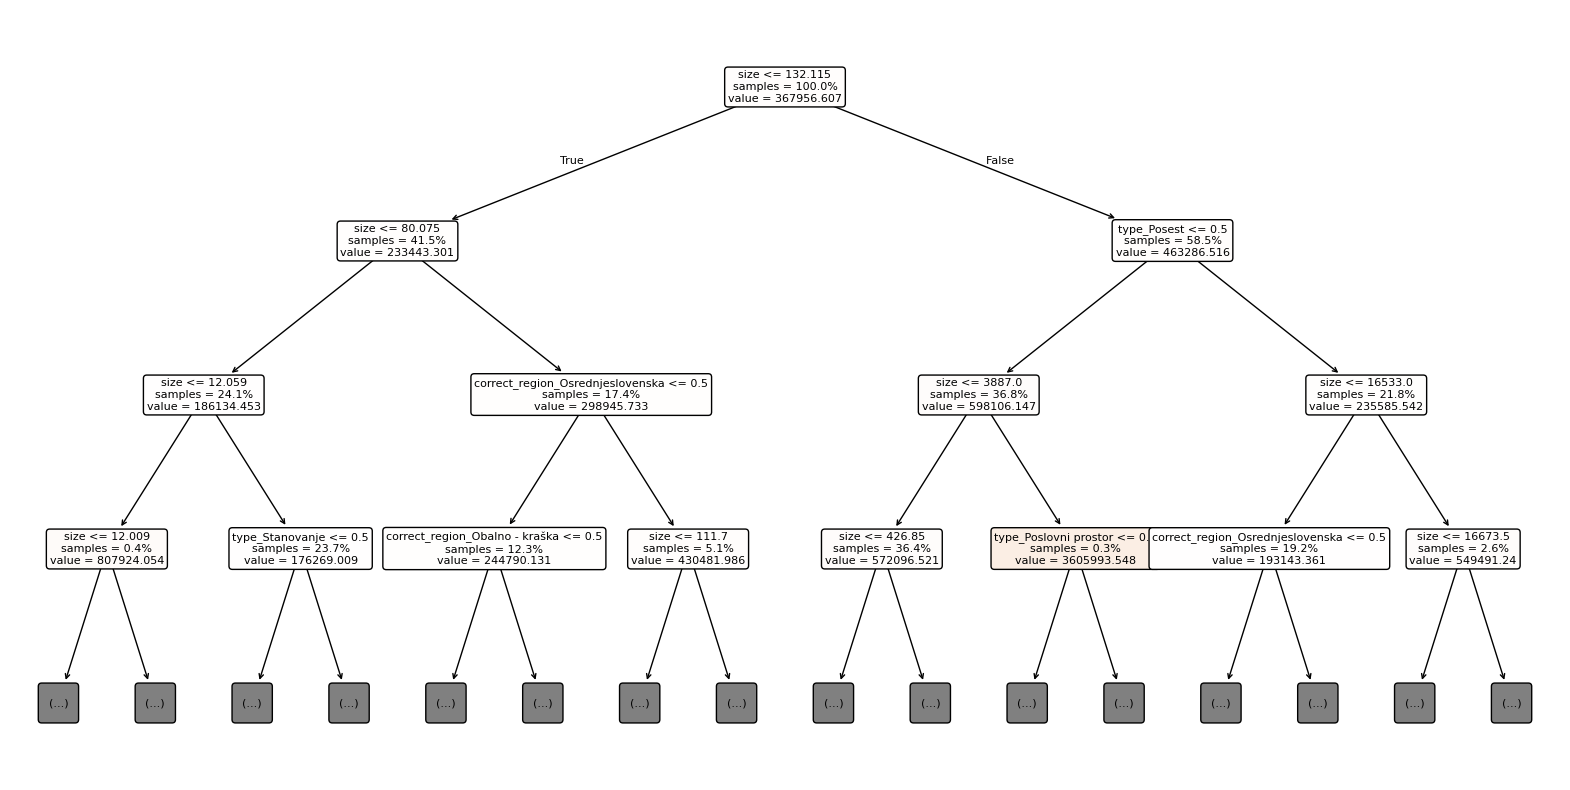

----------------------------
Podatki z normirano ceno/m2
                                  feature  importance
2                   type_Poslovni prostor    0.459856
1                             type_Posest    0.185259
15               correct_region_Savinjska    0.113768
0                               type_Hiša    0.061515
4                         type_Stanovanje    0.061139
9          correct_region_Obalno - kraška    0.050903
10       correct_region_Osrednjeslovenska    0.049099
12                correct_region_Pomurska    0.003301
3                  type_Počitniški objekt    0.002447
8                  correct_region_Koroška    0.002298
14  correct_region_Primorsko - notranjska    0.002055
6                  correct_region_Goriška    0.001837
16                correct_region_Zasavska    0.001718
13                correct_region_Posavska    0.001707
11               correct_region_Podravska    0.001330
7    correct_region_Jugovzhodna Slovenija    0.001307
5                        

In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree

X = nepremicnine_reg.drop('price', axis=1)
y = nepremicnine_reg['price']

X_encoded = pd.get_dummies(X, drop_first=True)

model = DecisionTreeRegressor()
model.fit(X_encoded, y)

importances = model.feature_importances_

feature_importance_sorted = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Navadni podatki")
print(feature_importance_sorted)

plt.figure(figsize=(20, 10))
plot_tree(model,
    feature_names=X_encoded.columns,
    filled=True,
    rounded=True,
    impurity=False,
    precision=3,
    label="all",
    max_depth=3,
    proportion=True,
    fontsize=8,)
plt.show()


print("----------------------------")

X = nepremicnine_norm.drop('price_per_m2', axis=1)
y = nepremicnine_norm['price_per_m2']

X_encoded = pd.get_dummies(X, drop_first=True)

model = DecisionTreeRegressor()
model.fit(X_encoded, y)

importances = model.feature_importances_

feature_importance_sorted = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Podatki z normirano ceno/m2")
print(feature_importance_sorted)


Pri napovedovanju cene z uporabo metode odločitvenih dreves je, če ocenjujemo glede na tip, regijo in površino nepremičnine (pri čemer na neštevilskih atributih uporabimo metodo one-hot encoding), najbolj pomemben atribut površina (pomembnost okoli 0.78). Če pa napovedujemo ceno/m², torej le glede na tip in regijo, je najpomembnejši atribut ali je nepremičnina tipa poslovni prostor (pomembnost okoli 0.45).